In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Fandango Stars vs True Rating

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

In [3]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [4]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


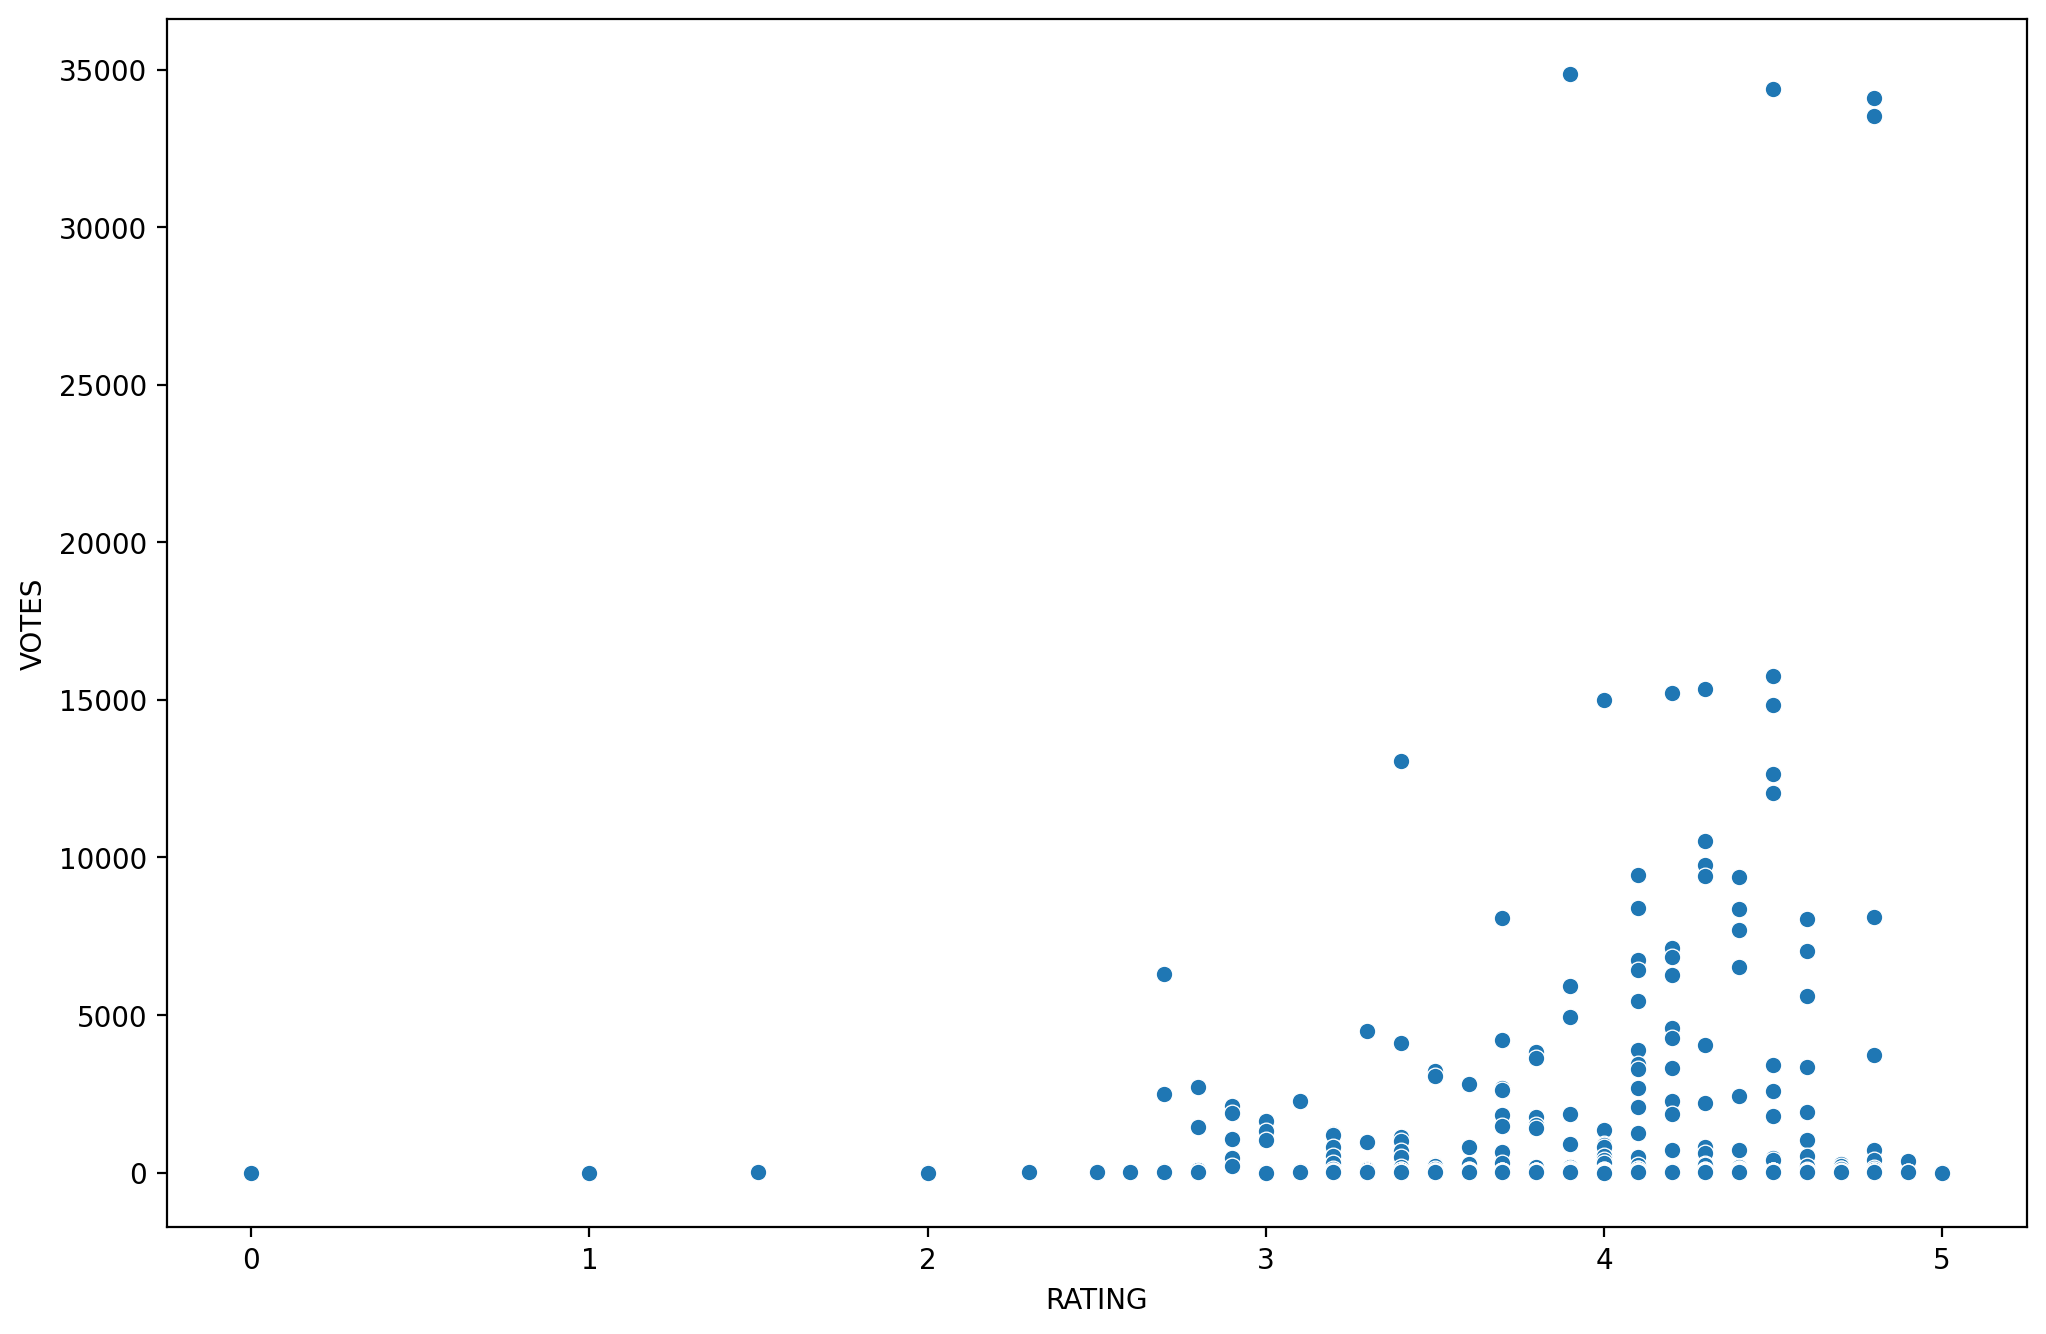

In [6]:
#Popularity of a film vs Rating
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(data=fandango,x='RATING',y='VOTES');

In [7]:
#Correlation
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [8]:
#Creating Year column
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[1])
fandango['YEAR'] = fandango['YEAR'].apply(lambda year:year.split(')')[0])
fandango['FILM'] = fandango['FILM'].apply(lambda title:title.split('(')[0])

In [9]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey,4.0,3.9,34846,2015
1,Jurassic World,4.5,4.5,34390,2015
2,American Sniper,5.0,4.8,34085,2015
3,Furious 7,5.0,4.8,33538,2015
4,Inside Out,4.5,4.5,15749,2015


In [10]:
#Movies per Year
fandango['YEAR'].value_counts()

2015                  474
2014                   24
Stratford Festival      2
1964                    1
2012                    1
2016                    1
Shi Gu                  1
Name: YEAR, dtype: int64

In [11]:
#Dropping Stratford Festival and Shi Gu
fandango = fandango[fandango.YEAR != 'Stratford Festival']
fandango = fandango[fandango.YEAR != 'Shi Gu']

In [12]:
fandango['YEAR'].value_counts()

2015    474
2014     24
1964      1
2012      1
2016      1
Name: YEAR, dtype: int64

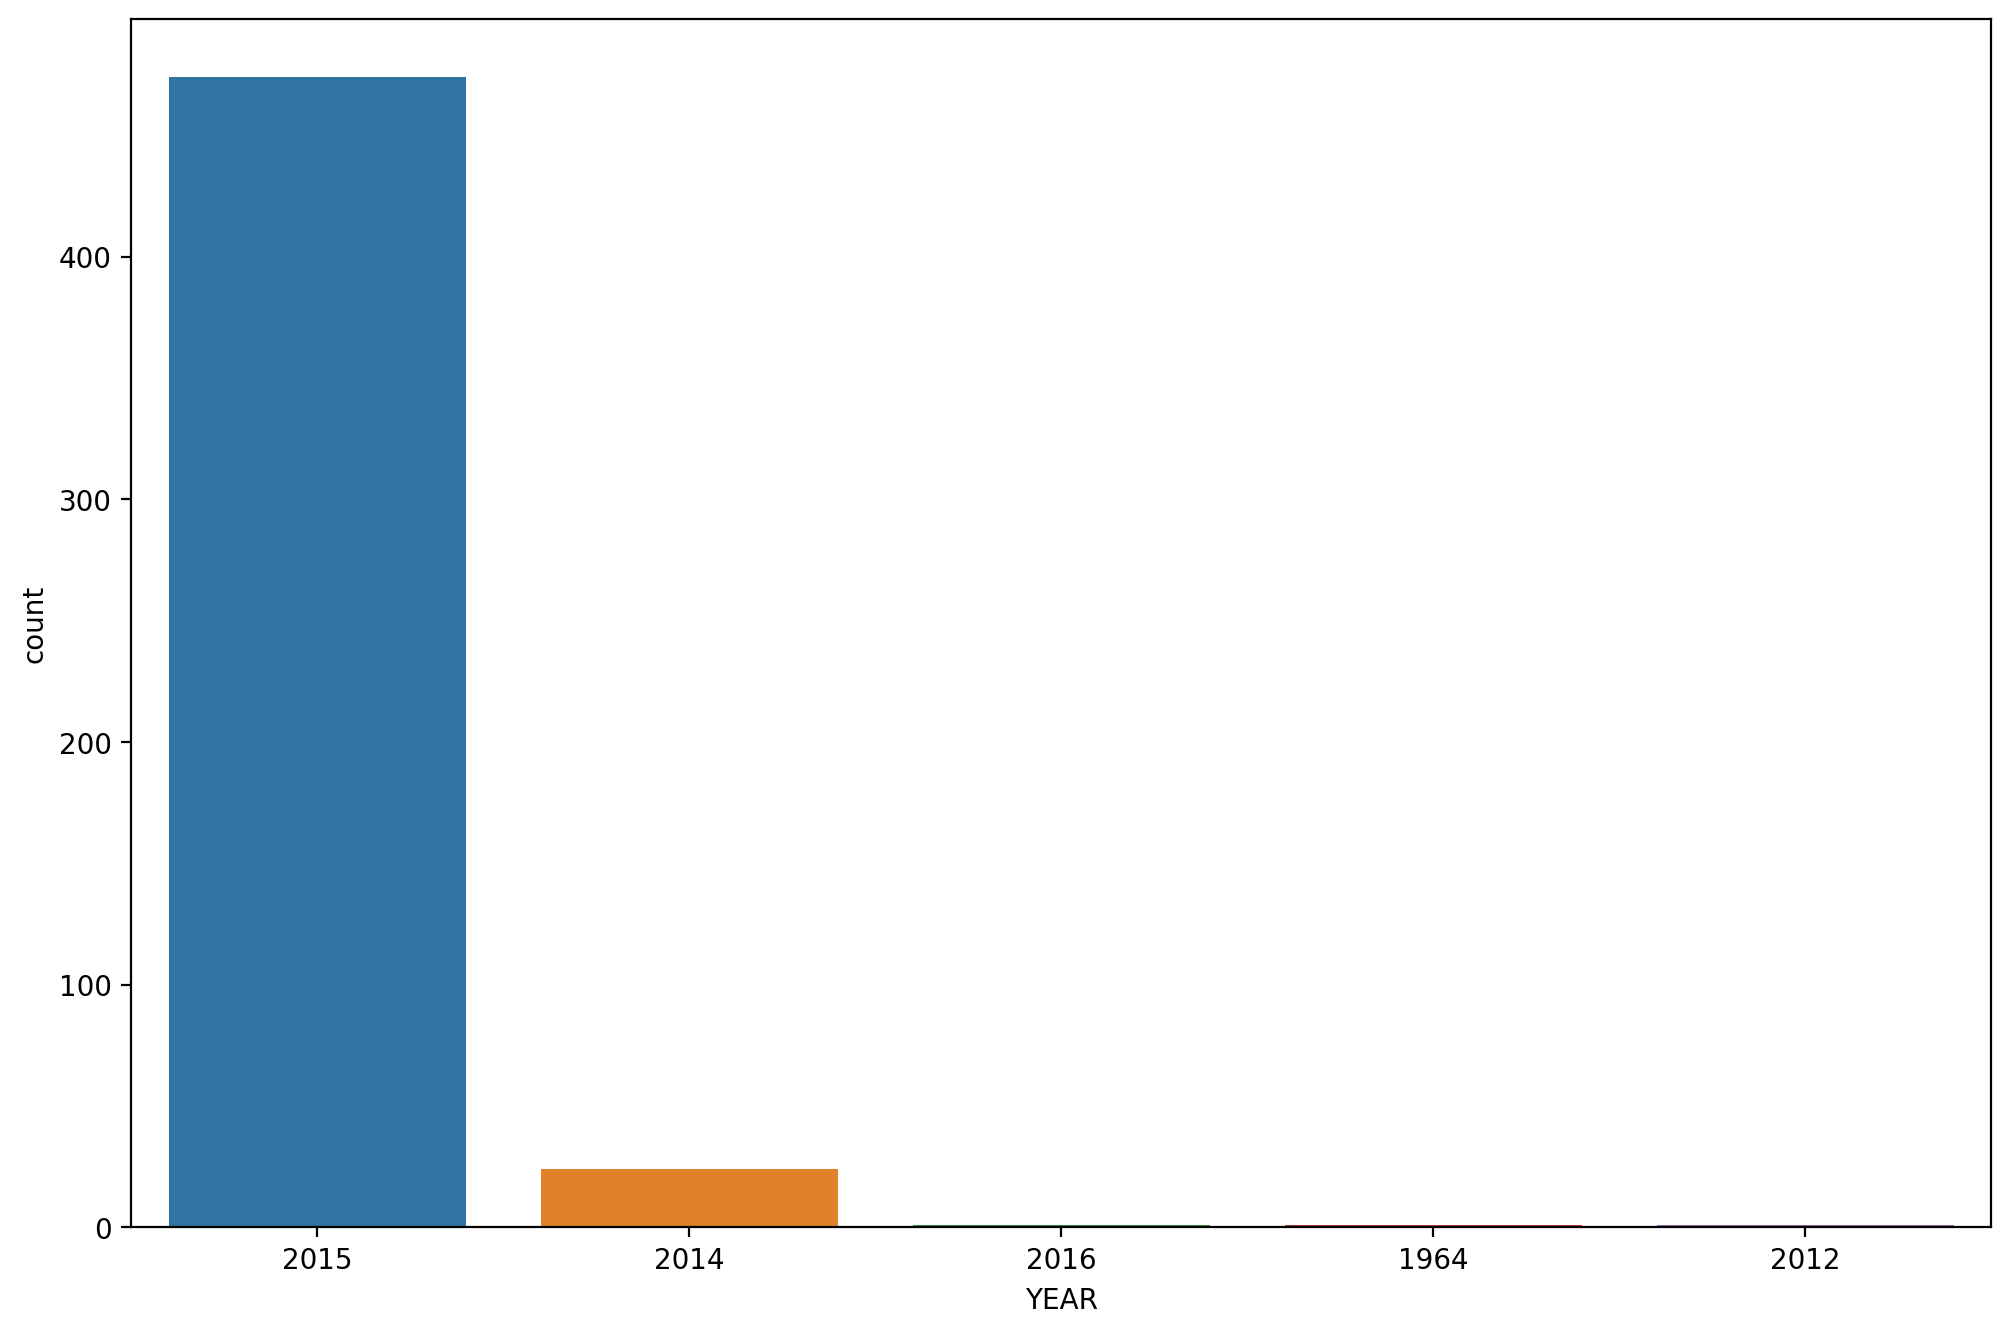

In [13]:
#Movies per Year
plt.figure(figsize=(12,8),dpi=200)
sns.countplot(data=fandango,x='YEAR');

In [14]:
#Top 10 Movies by Votes
fandango.sort_values(by='VOTES',ascending=False).head(10)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey,4.0,3.9,34846,2015
1,Jurassic World,4.5,4.5,34390,2015
2,American Sniper,5.0,4.8,34085,2015
3,Furious 7,5.0,4.8,33538,2015
4,Inside Out,4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies,4.5,4.3,15337,2014
6,Kingsman: The Secret Service,4.5,4.2,15205,2015
7,Minions,4.0,4.0,14998,2015
8,Avengers: Age of Ultron,5.0,4.5,14846,2015
9,Into the Woods,3.5,3.4,13055,2014


In [15]:
#Number of Movies with 0 Votes
len(fandango[fandango['VOTES']==0])

69

In [16]:
#Dataframe without Movies with 0 Votes
fandango = fandango[fandango['VOTES']!=0]

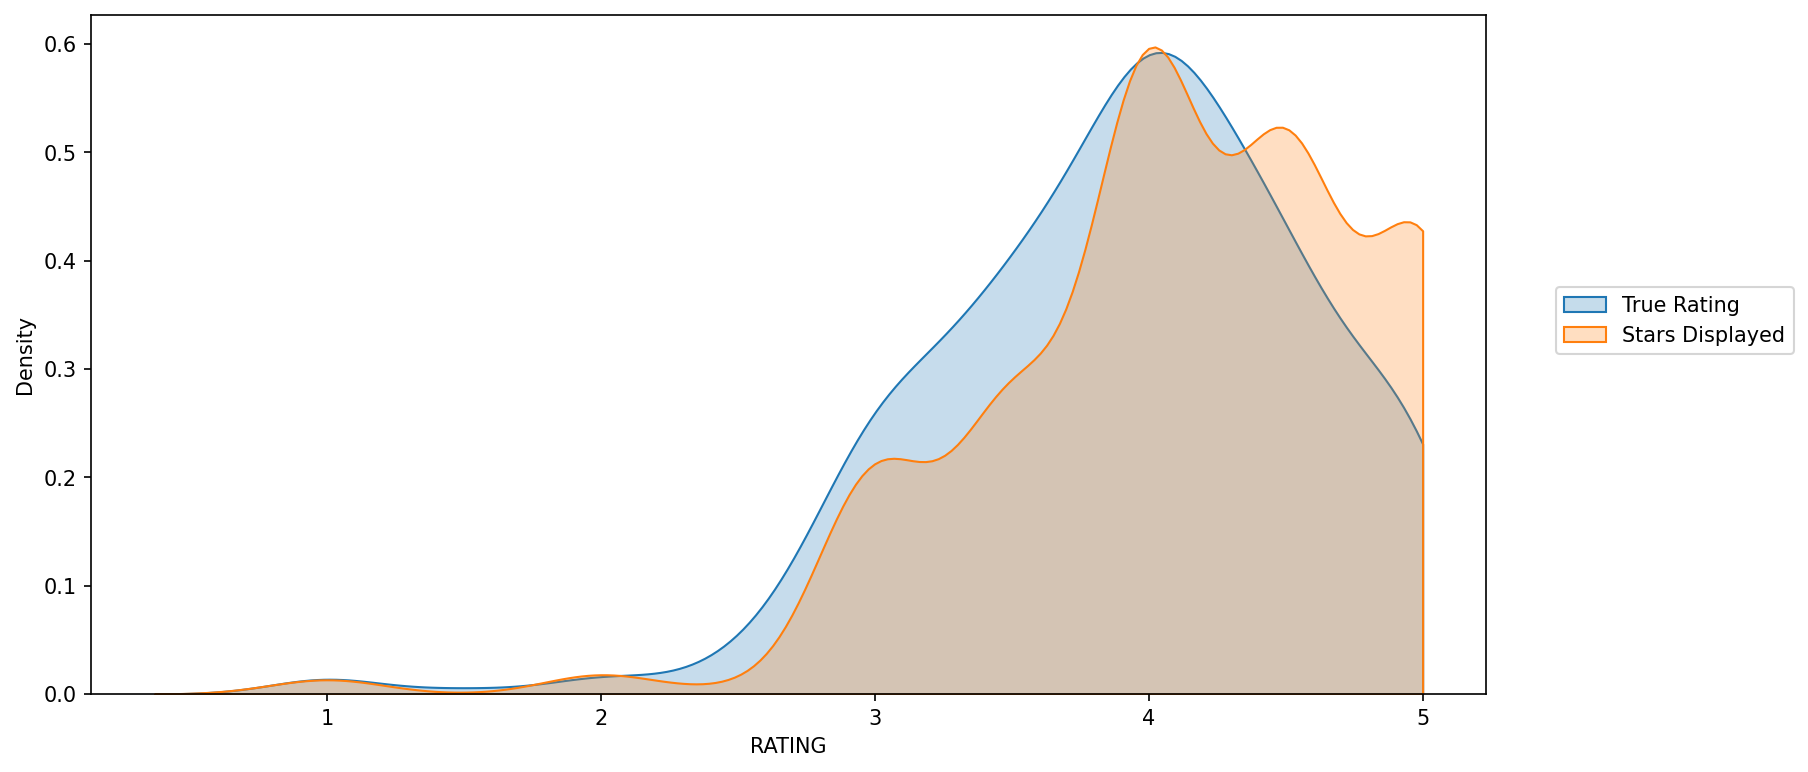

In [17]:
#Distribution of Stars and Ratings
plt.figure(figsize=(12,6),dpi=150)
sns.kdeplot(data=fandango,x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=fandango,x='STARS',clip=[0,5],fill=True,label='Stars Displayed')
plt.legend(loc=(1.05,0.5));

In [18]:
#Creatin new column. Difference between Stars and True Rating
fandango['STARS_DIFF'] = fandango['STARS'] - fandango['RATING']
fandango['STARS_DIFF'] = fandango['STARS_DIFF'].round(2)
fandango.head(10)

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey,4.0,3.9,34846,2015,0.1
1,Jurassic World,4.5,4.5,34390,2015,0.0
2,American Sniper,5.0,4.8,34085,2015,0.2
3,Furious 7,5.0,4.8,33538,2015,0.2
4,Inside Out,4.5,4.5,15749,2015,0.0
5,The Hobbit: The Battle of the Five Armies,4.5,4.3,15337,2014,0.2
6,Kingsman: The Secret Service,4.5,4.2,15205,2015,0.3
7,Minions,4.0,4.0,14998,2015,0.0
8,Avengers: Age of Ultron,5.0,4.5,14846,2015,0.5
9,Into the Woods,3.5,3.4,13055,2014,0.1


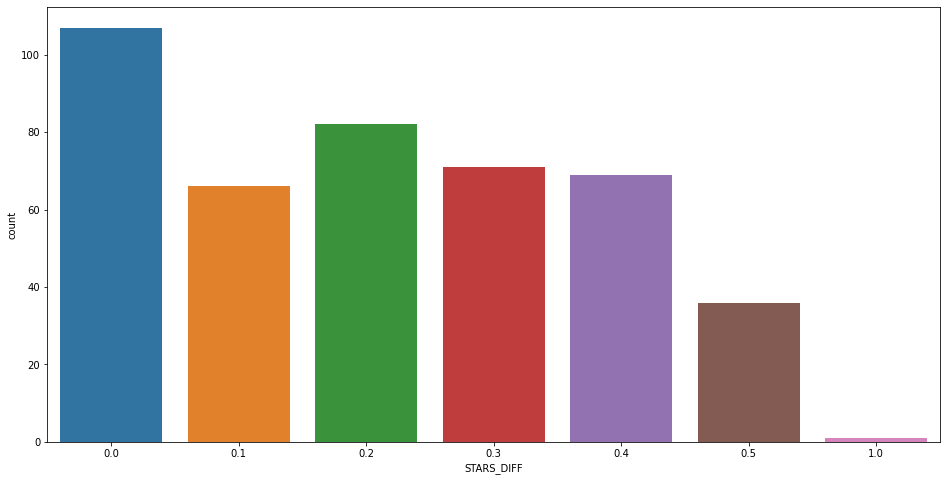

In [19]:
#Plotting STARS_DIFF
plt.figure(figsize=(16,8))
sns.countplot(data=fandango,x='STARS_DIFF');

In [20]:
#One Movie was displaying over a 1 star difference
fandango[fandango['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid,5.0,4.0,2,2015,1.0


# Fandango Ratings vs Other Sites


In [21]:
other = pd.read_csv('all_sites_scores.csv')

In [22]:
other.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [23]:
other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [24]:
other.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


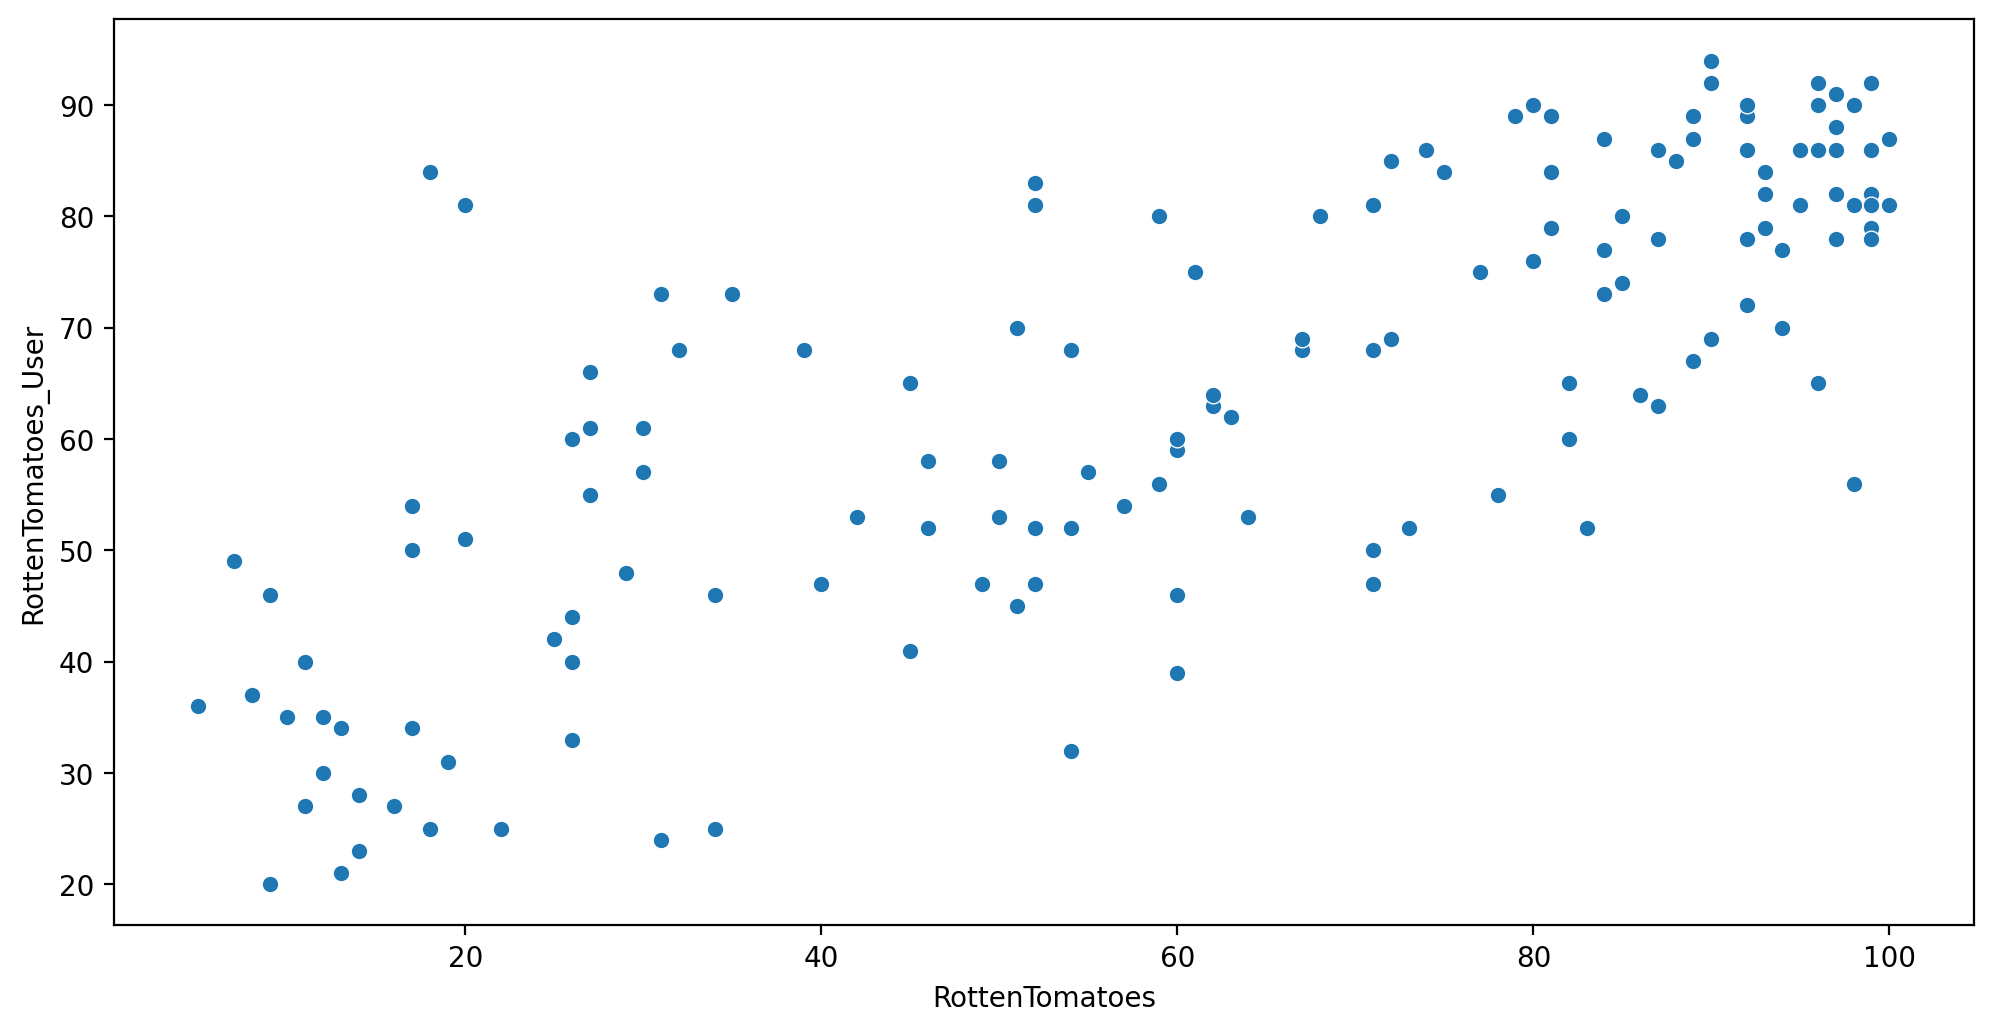

In [25]:
#RottenTomatoes
plt.figure(figsize=(12,6),dpi=200)
sns.scatterplot(data=other,x='RottenTomatoes',y='RottenTomatoes_User');

In [26]:
#Difference between Critics and User
other['RT_DIFF'] = other['RottenTomatoes'] - other['RottenTomatoes_User']

In [27]:
#Overall mean difference
other['RT_DIFF'].apply(abs).mean()

15.095890410958905

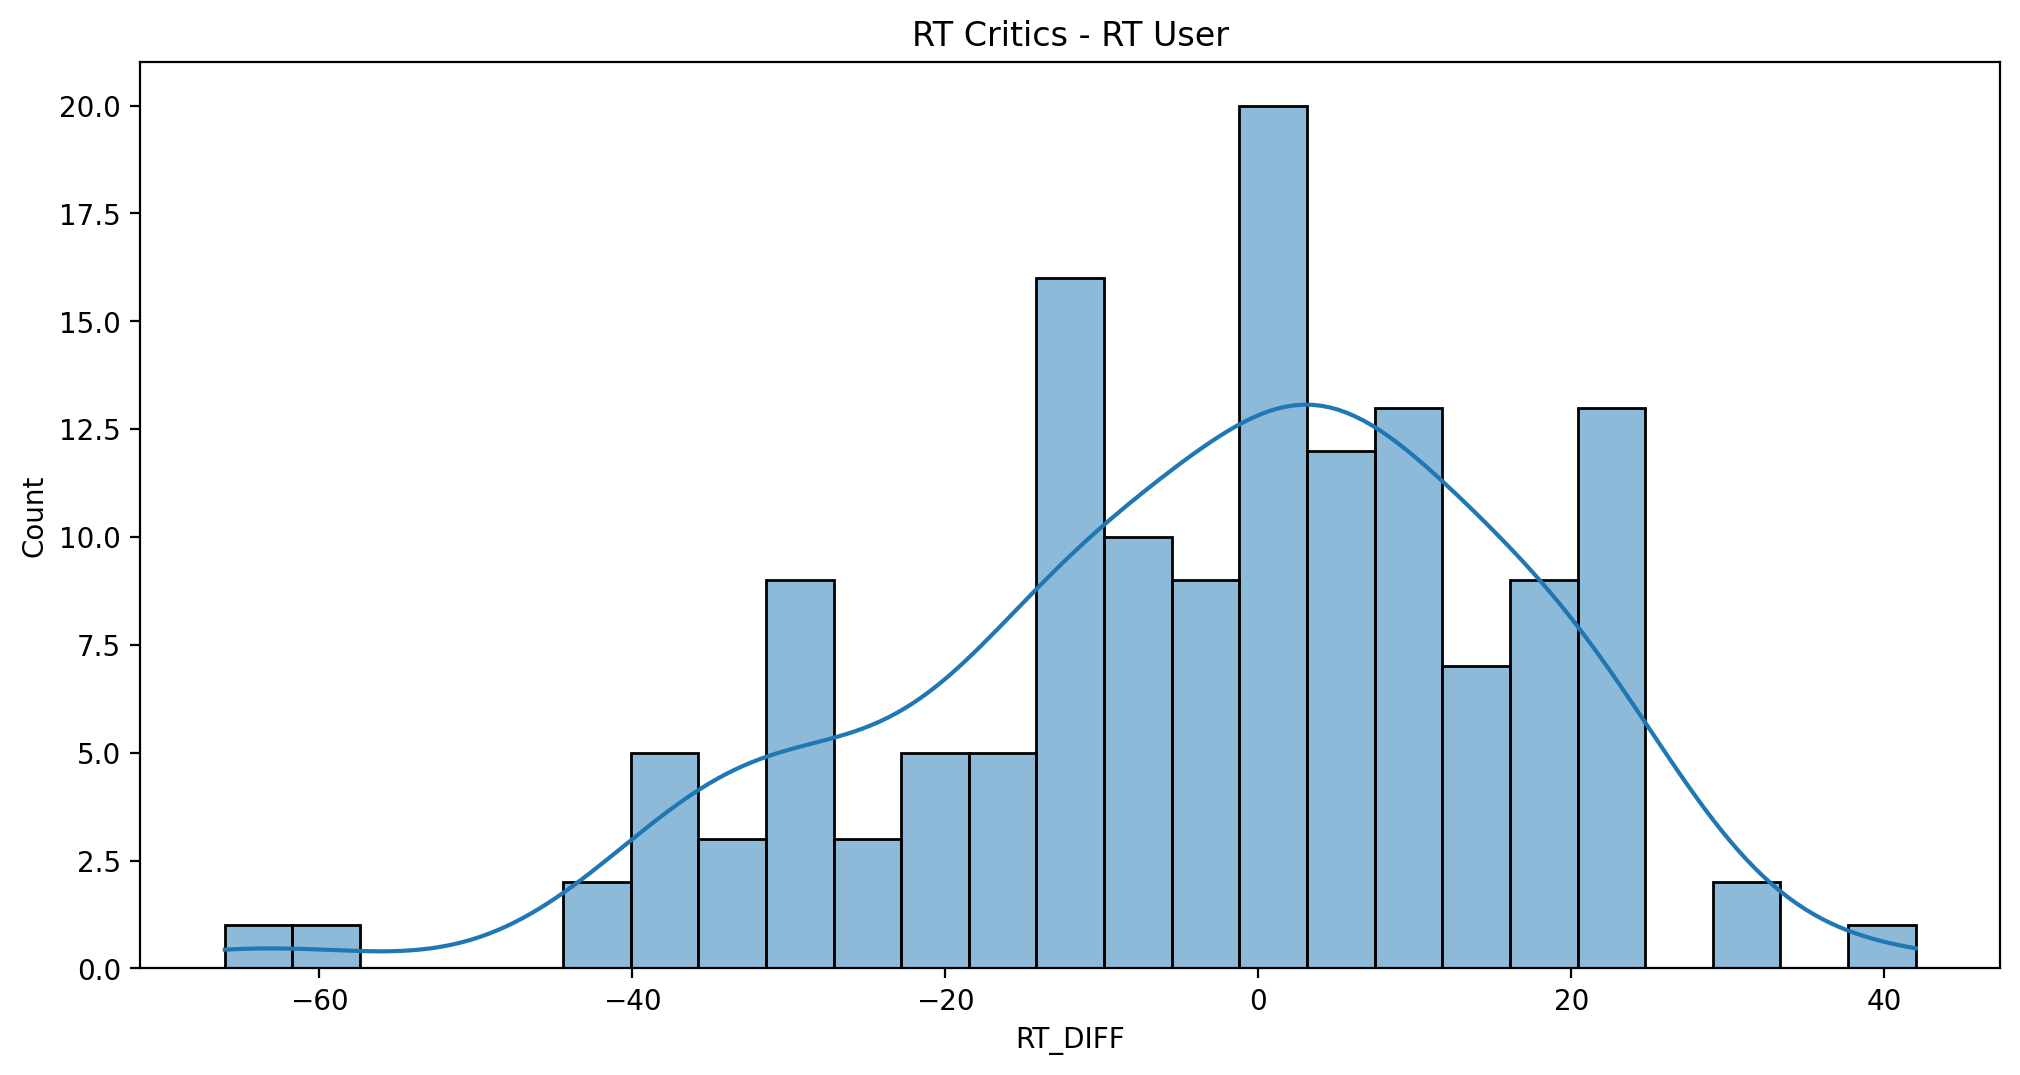

In [28]:
#Distribution of the differences between RT Critics and RT User
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=other,x='RT_DIFF',kde=True,bins=25)
plt.title('RT Critics - RT User');

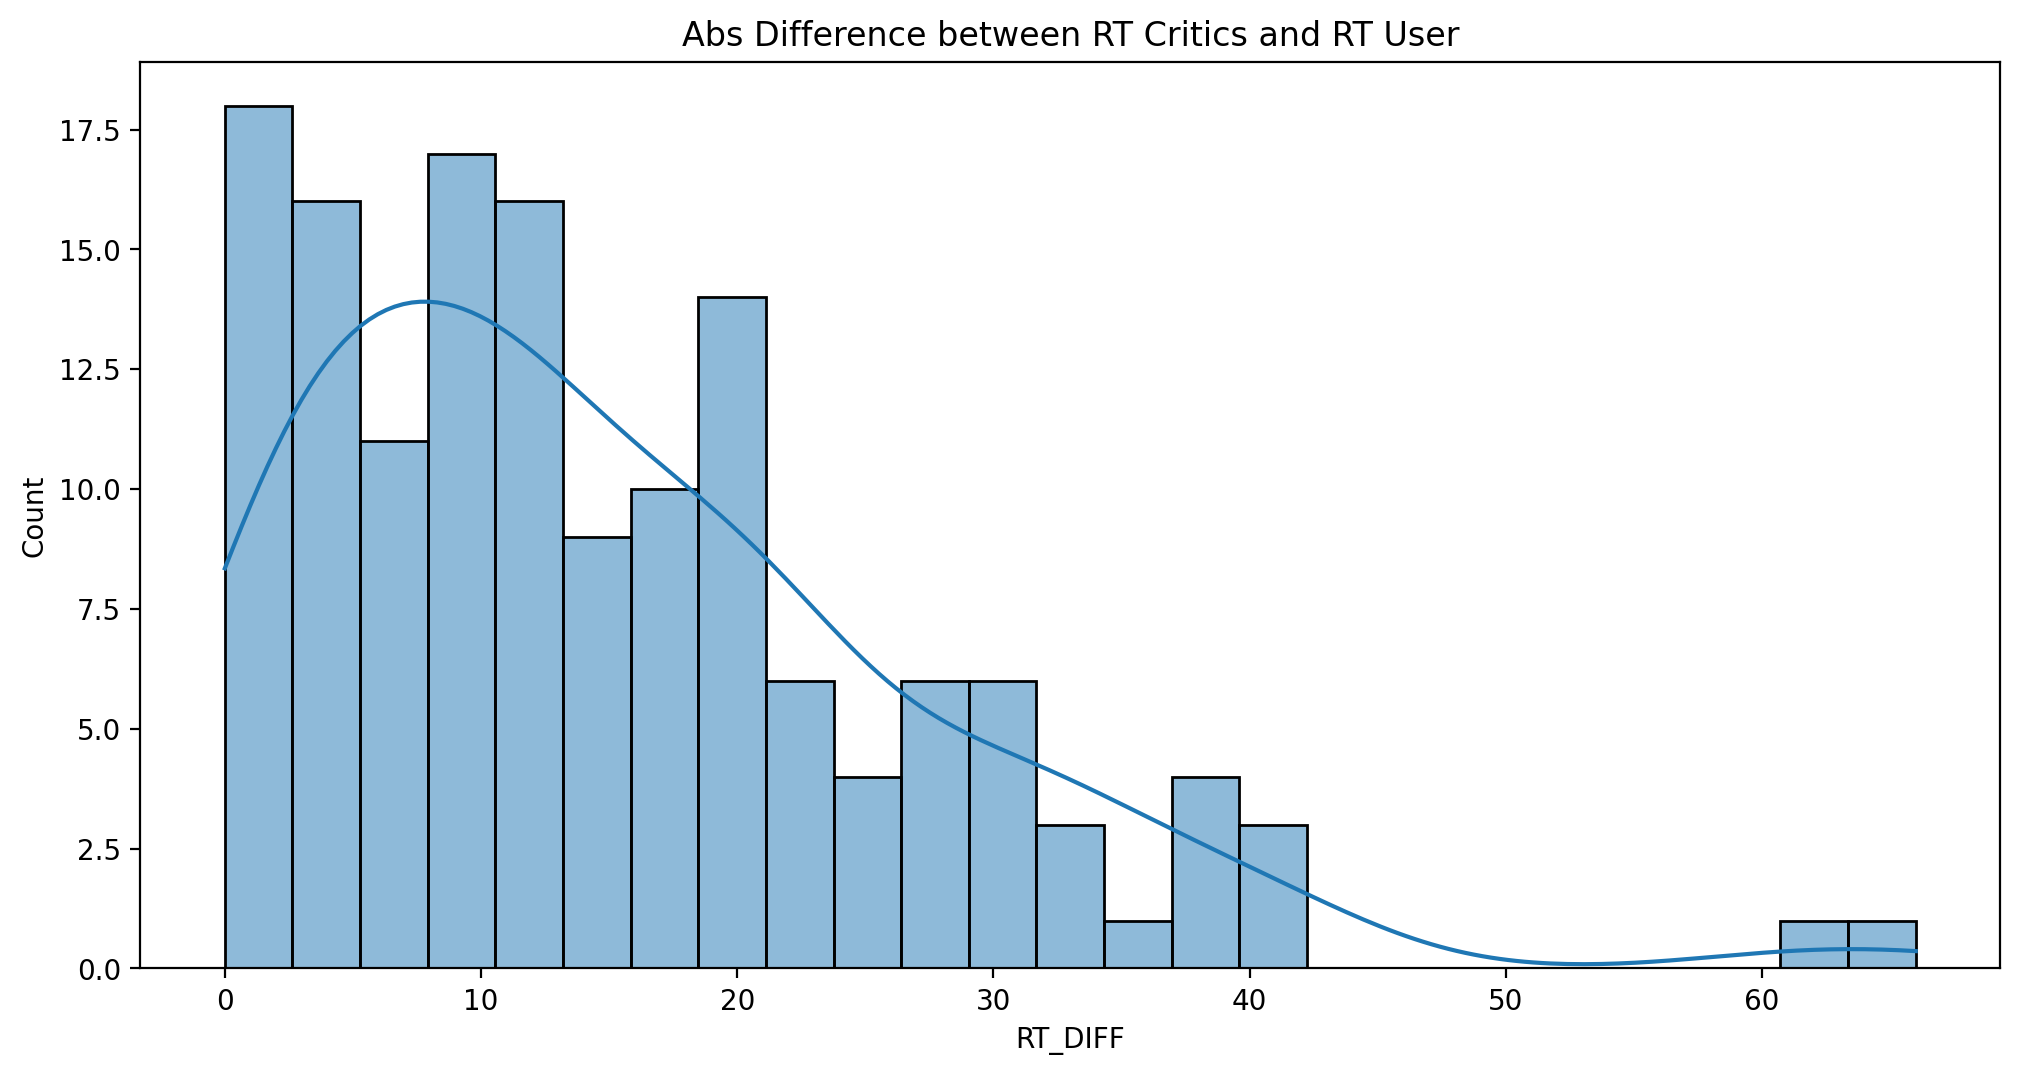

In [29]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(x=other['RT_DIFF'].apply(abs),kde=True,bins=25)
plt.title('Abs Difference between RT Critics and RT User');

In [30]:
#Top 5 Movies Users Rated Higher than Critics on average
other.nsmallest(5,'RT_DIFF')[['FILM', 'RT_DIFF']]

,FILM,RT_DIFF
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [31]:
#Top 5 Movies Critics Rated Higher than Users on average
other.nlargest(5,'RT_DIFF')[['FILM', 'RT_DIFF']]

,FILM,RT_DIFF
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


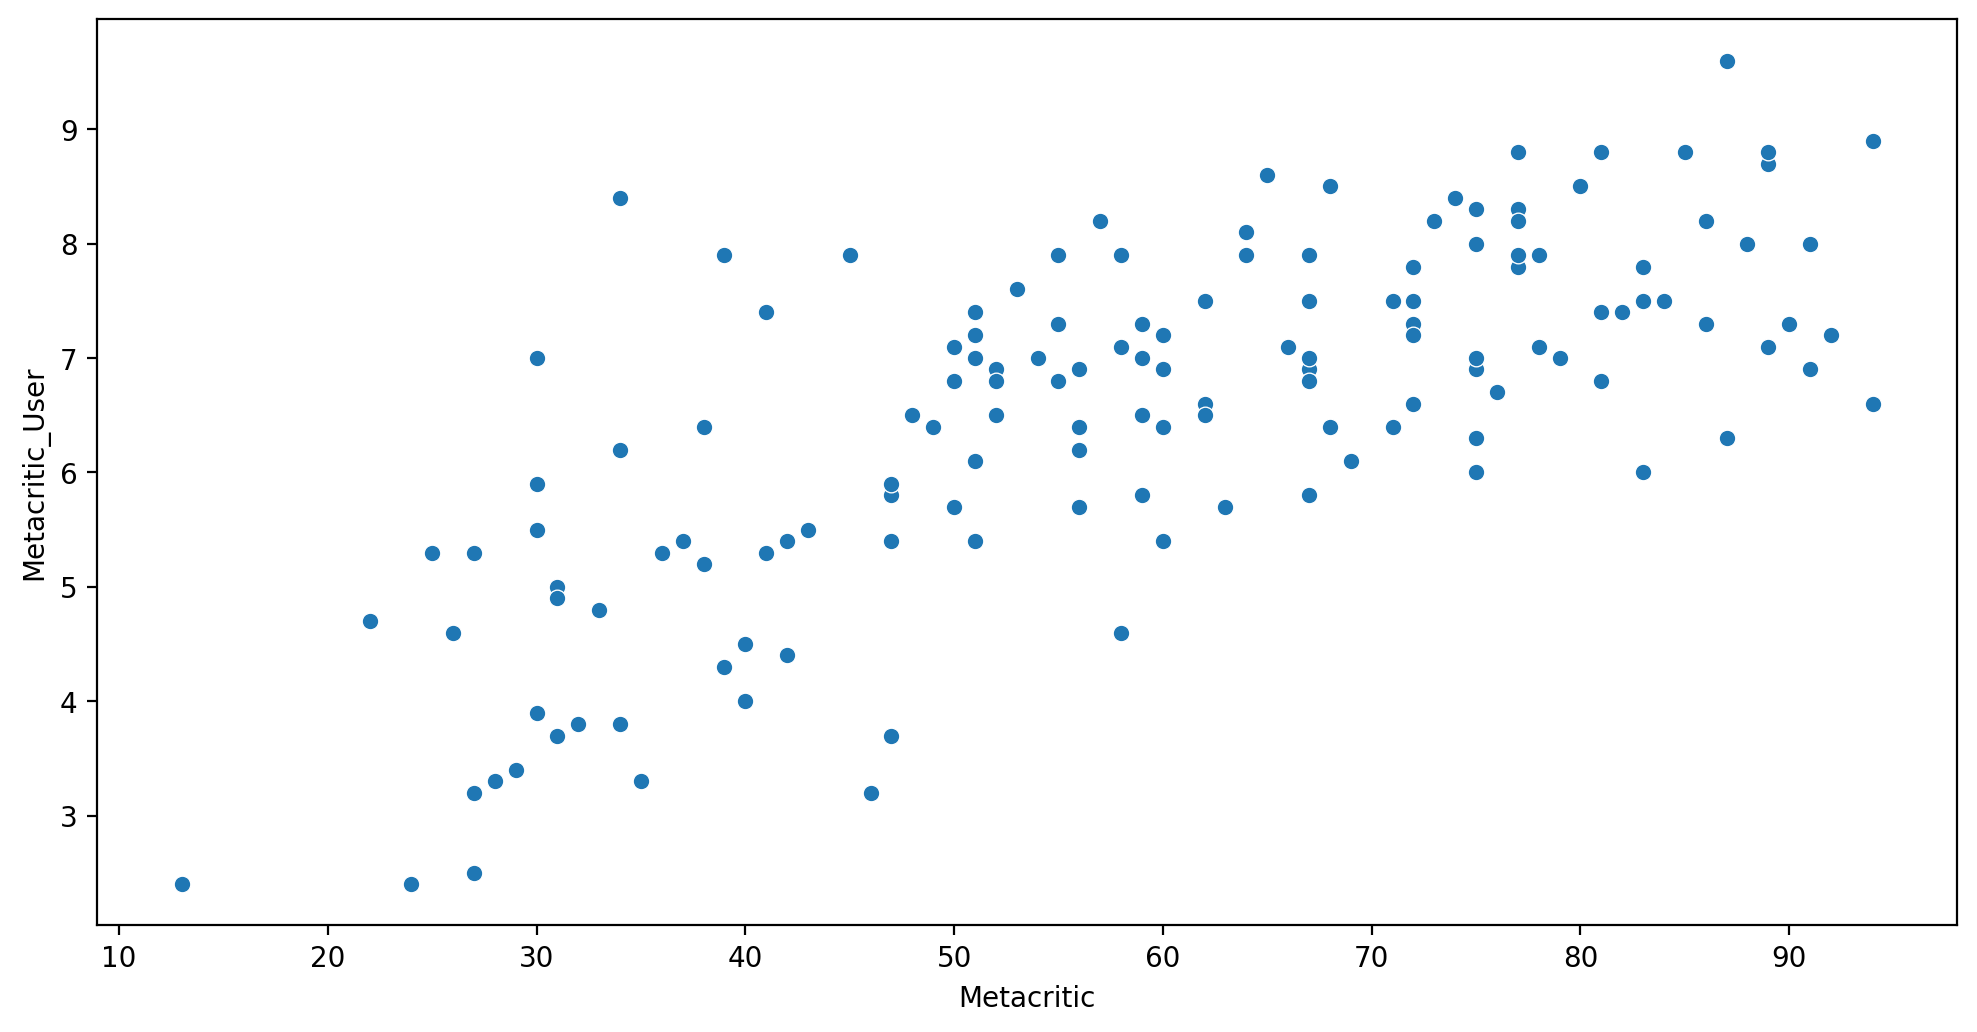

In [32]:
#MetaCritic Rating vs User Rating
plt.figure(figsize=(12,6),dpi=200)
sns.scatterplot(data=other,x='Metacritic',y='Metacritic_User');

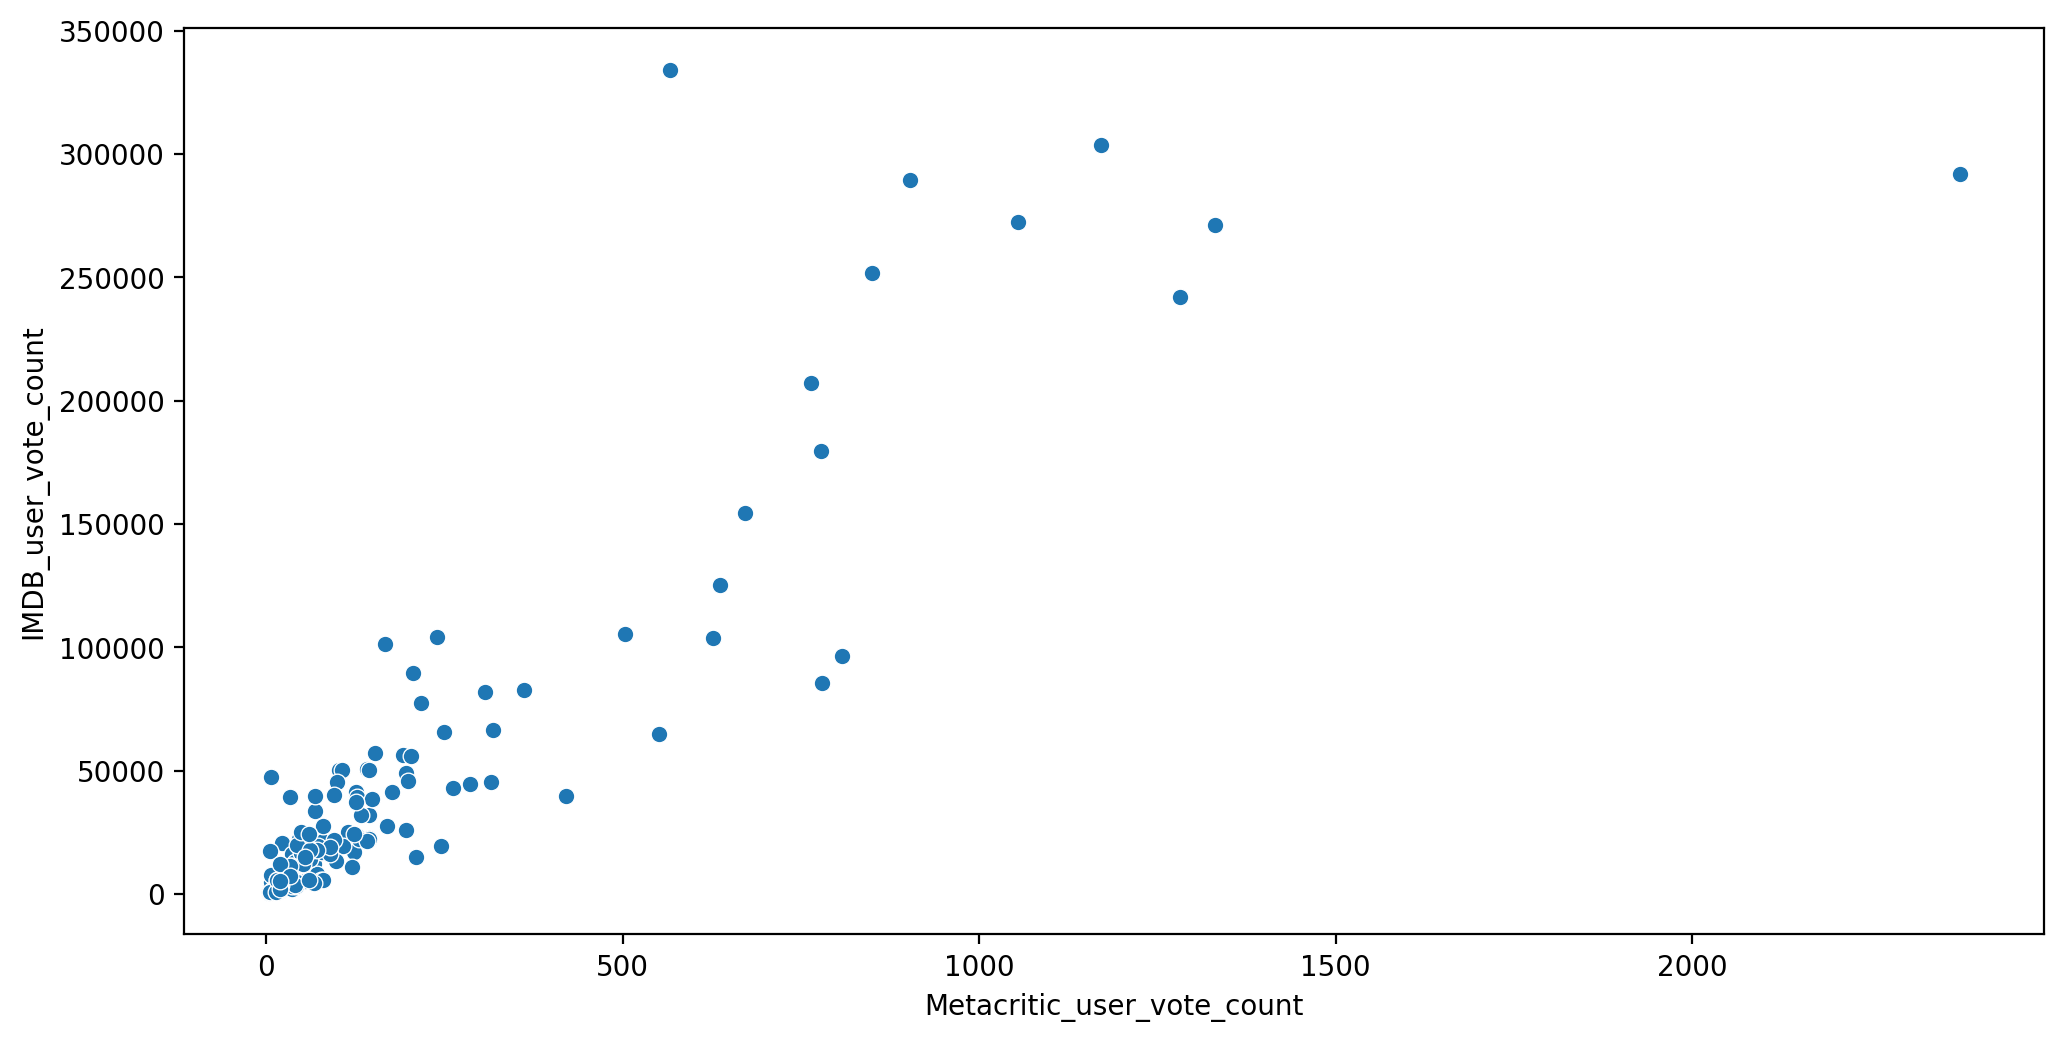

In [33]:
#Vote Counts Metacritic vs Vote Counts IMDB
plt.figure(figsize=(12,6),dpi=200)
sns.scatterplot(data=other,x='Metacritic_user_vote_count',y='IMDB_user_vote_count');

In [34]:
#Movie with the highest vote count on IMDB
other.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [35]:
#Movie with the highest vote count on Metacritic
other.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


# Fandango vs Other Sites

In [36]:
#Merging dataframes 
other['FILM'] = other['FILM'].apply(lambda title:title.split('(')[0])
df = pd.merge(fandango,other,on='FILM',how='inner')
df.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF
0,Fifty Shades of Grey,4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World,4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper,5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7,5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out,4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   STARS_DIFF                  145 non-null    float64
 6   RottenTomatoes              145 non-null    int64  
 7   RottenTomatoes_User         145 non-null    int64  
 8   Metacritic                  145 non-null    int64  
 9   Metacritic_User             145 non-null    float64
 10  IMDB                        145 non-null    float64
 11  Metacritic_user_vote_count  145 non-null    int64  
 12  IMDB_user_vote_count        145 non-null    int64  
 13  RT_DIFF                     145 non

In [38]:
df.describe()

,STARS,RATING,VOTES,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,4.086207,3.841379,3817.696552,0.244828,60.634483,63.696552,58.696552,6.508966,6.729655,184.489655,42572.186207,-3.062069
std,0.541169,0.502437,6368.668671,0.152721,30.161098,19.974749,19.538183,1.510883,0.957944,317.361740,67558.506121,19.218488
min,3.000000,2.700000,35.000000,0.000000,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000,-66.000000
25%,3.500000,3.500000,218.000000,0.100000,31.000000,50.000000,43.000000,5.700000,6.300000,33.000000,5626.000000,-14.000000
50%,4.000000,3.900000,1430.000000,0.200000,63.000000,66.000000,59.000000,6.800000,6.900000,72.000000,18986.000000,0.000000
75%,4.500000,4.200000,4279.000000,0.400000,89.000000,81.000000,75.000000,7.500000,7.400000,167.000000,44711.000000,11.000000
max,5.000000,4.800000,34846.000000,0.500000,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000,42.000000


In [39]:
#Normalized columns for all ratings
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] =  np.round(df['RottenTomatoes_User']/20,1)

df['Meta_Norm'] =  np.round(df['Metacritic']/20,1)
df['Meta_U_Norm'] =  np.round(df['Metacritic_User']/2,1)

df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

In [40]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey,4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World,4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper,5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7,5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out,4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [41]:
#Dataframe with only normalized columns
norm_scores = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

In [42]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


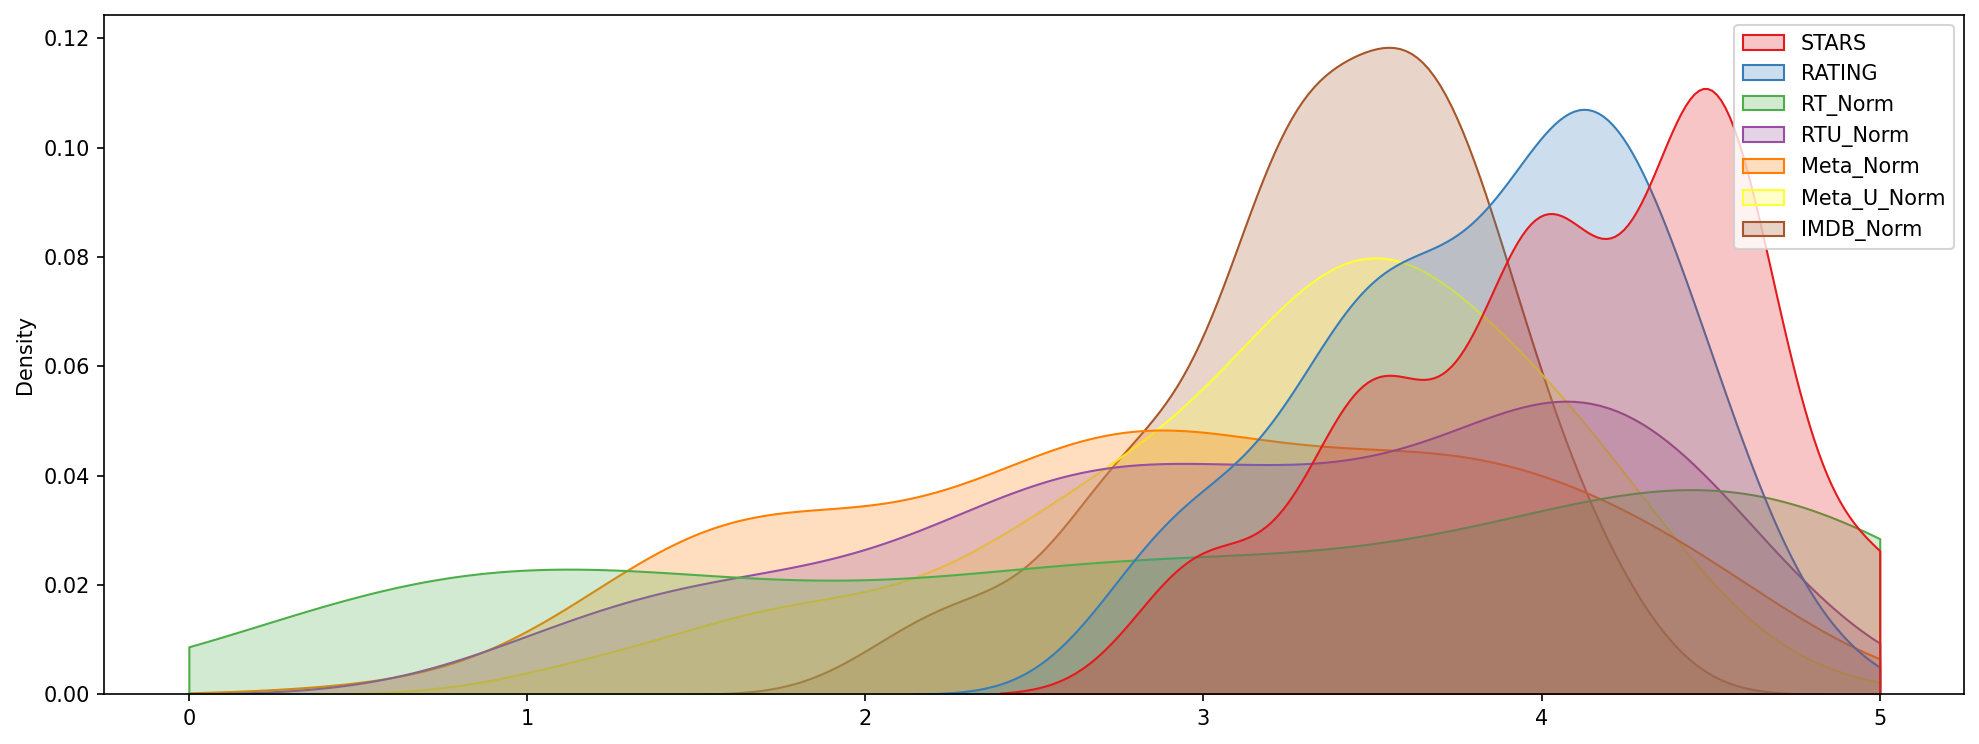

In [43]:
#Distribution of Scores
fig, ax = plt.subplots(figsize=(16,6),dpi=150)
sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1',ax=ax);

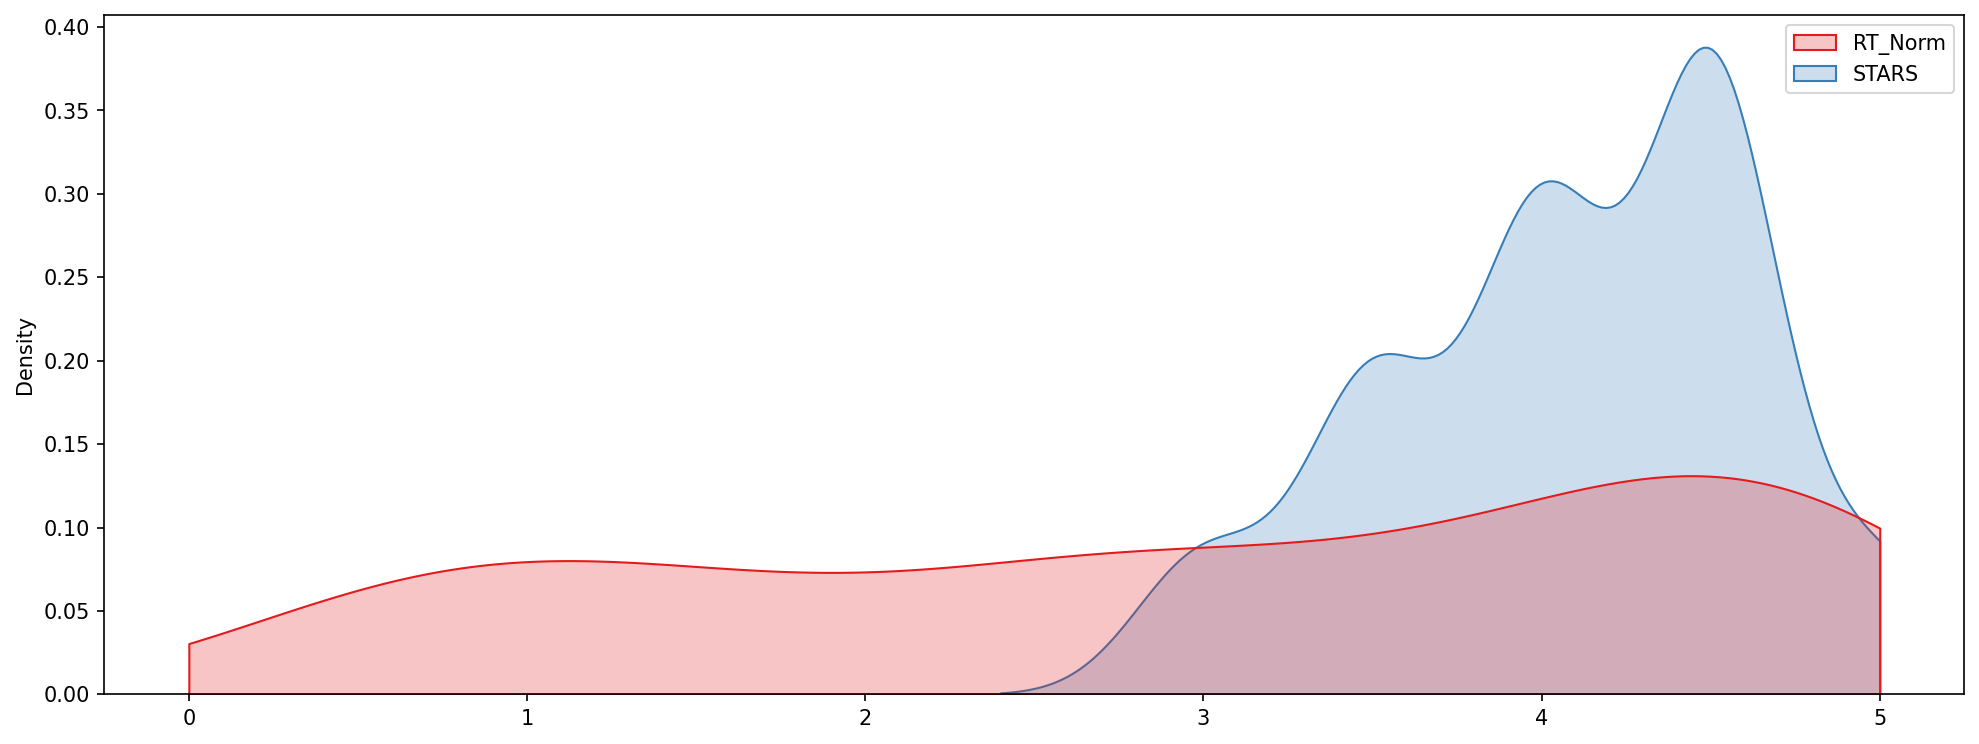

In [44]:
#Distribution of RottenTomatoes vs Fandango
fig, ax = plt.subplots(figsize=(16,6),dpi=150)
sns.kdeplot(data=norm_scores[['RT_Norm','STARS']],clip=[0,5],shade=True,palette='Set1',ax=ax);

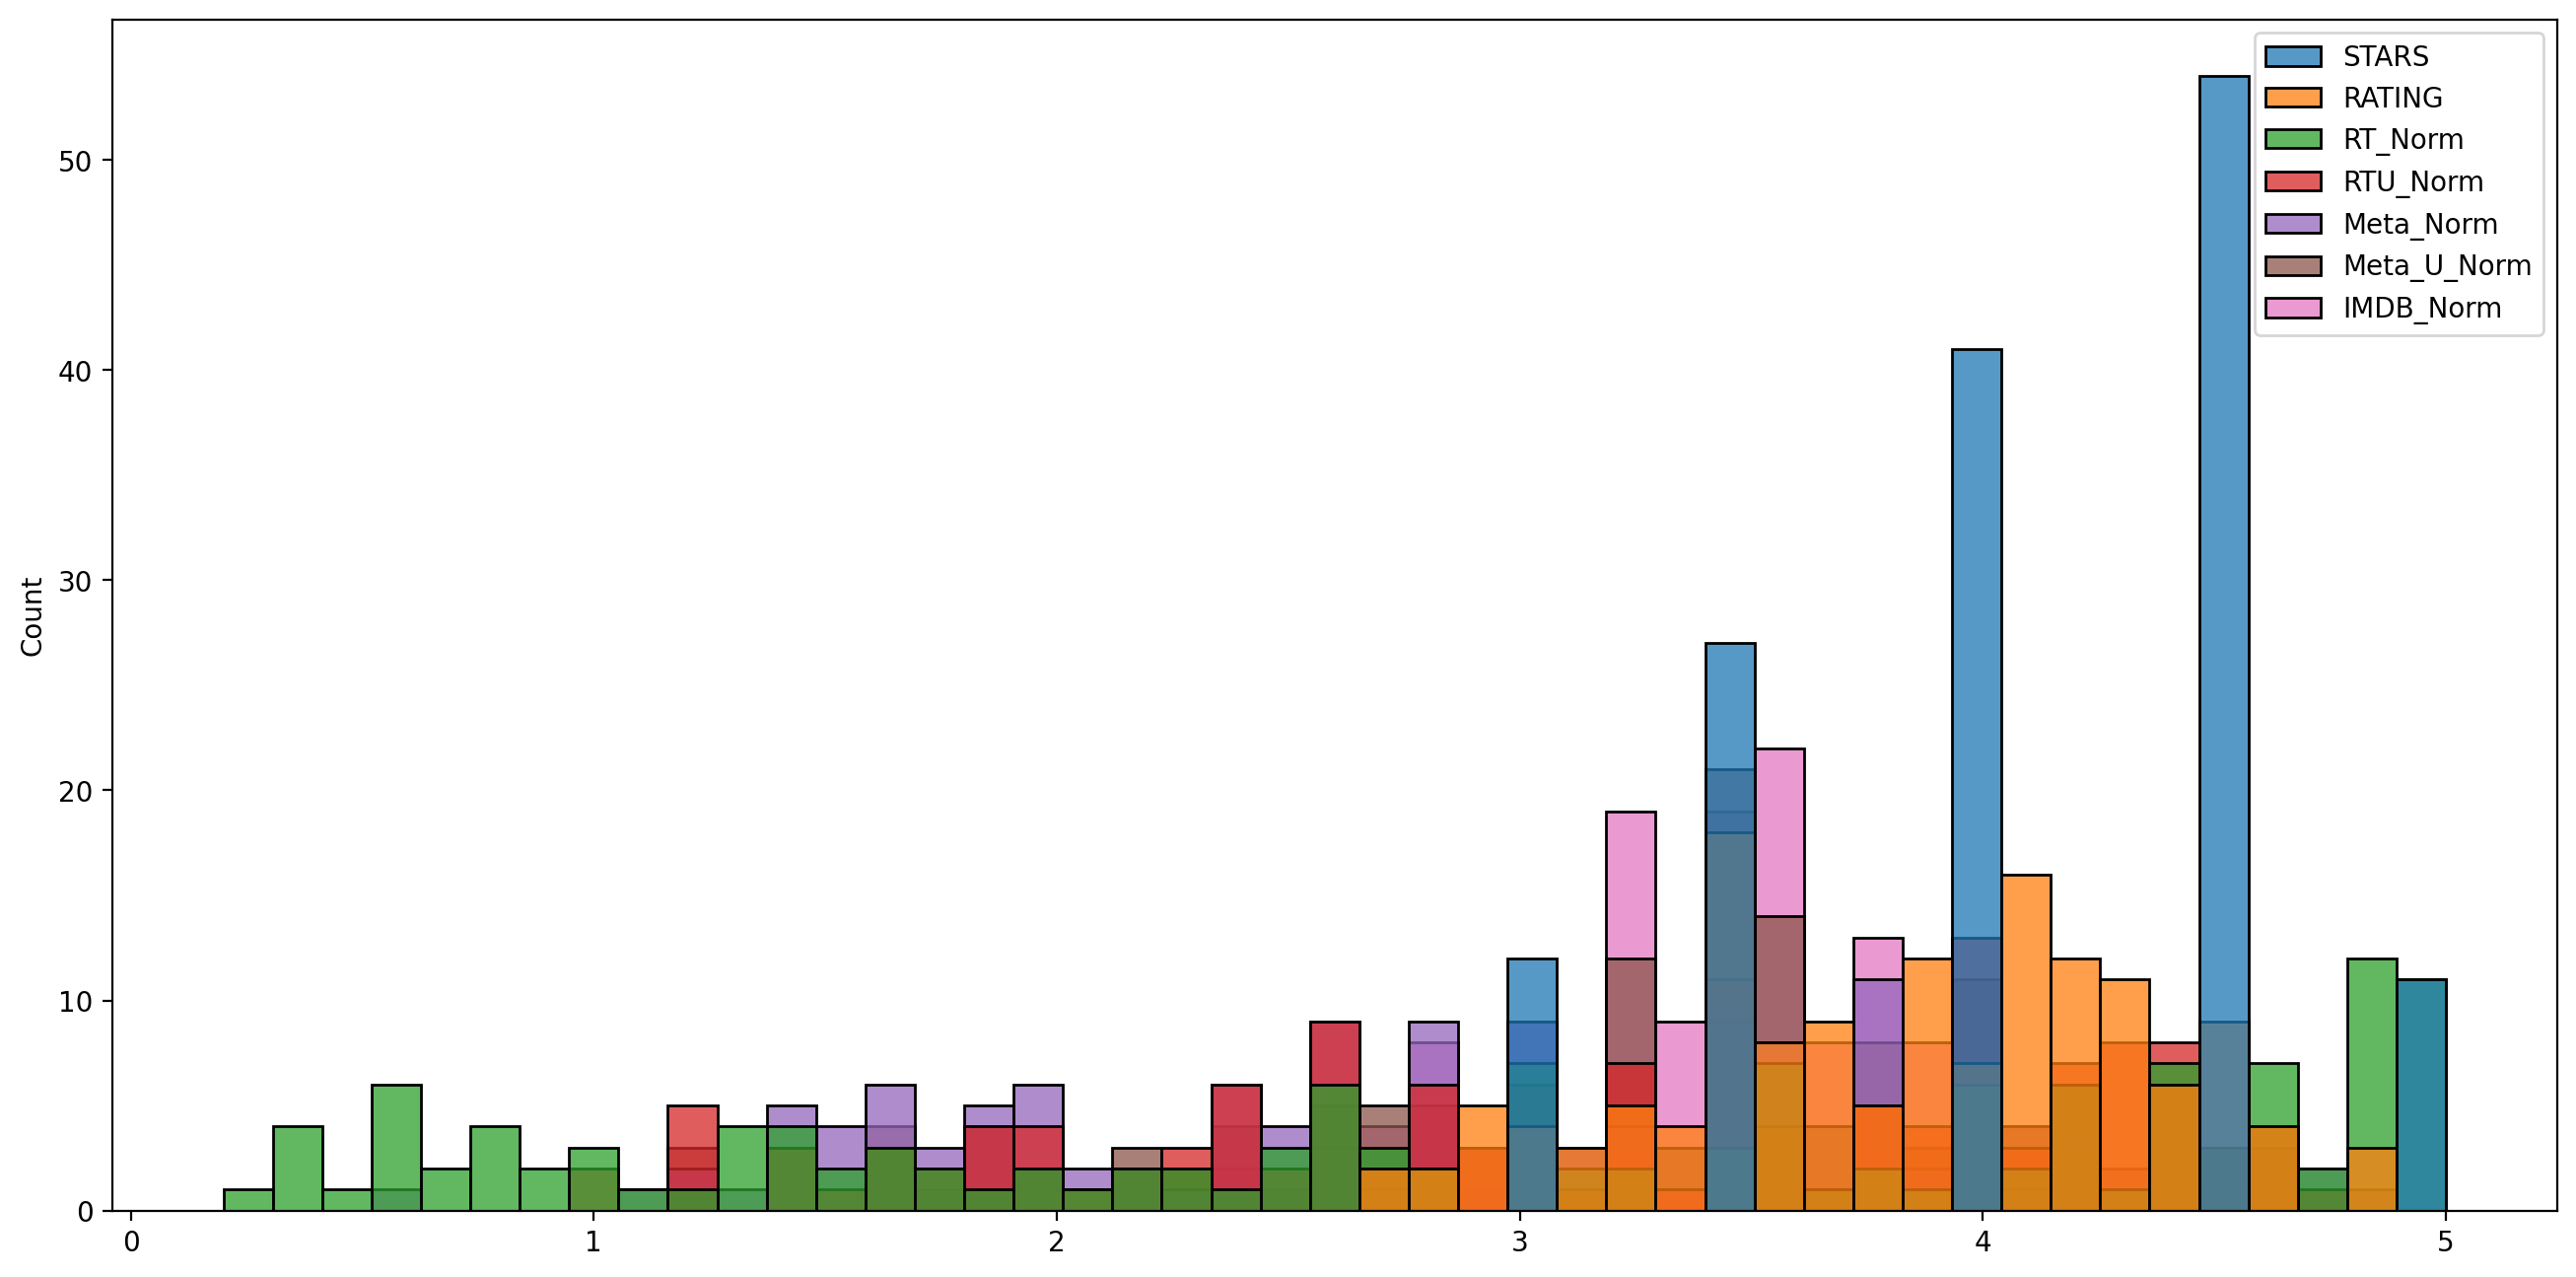

In [45]:
#Normalized scores
plt.figure(figsize=(16,8),dpi=200)
sns.histplot(norm_scores,bins=45);

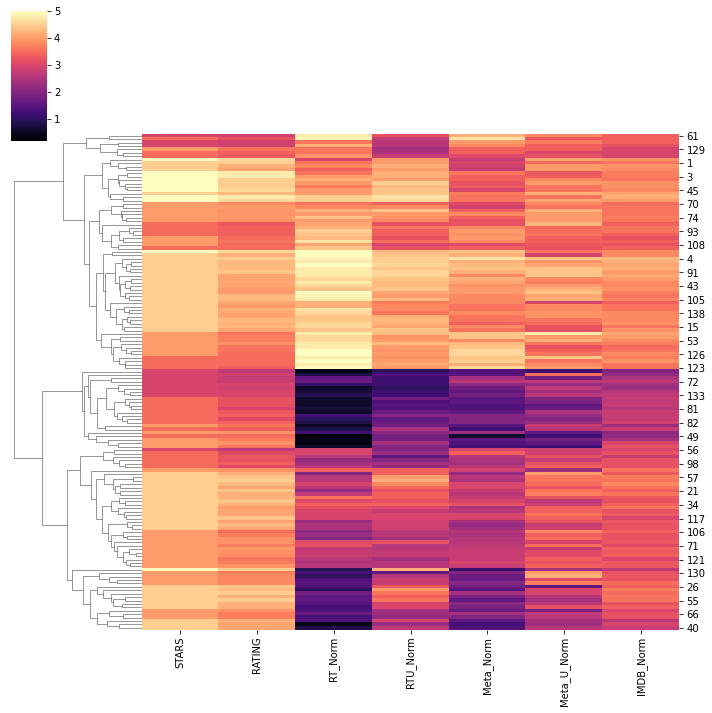

In [46]:
#Cluster map
sns.clustermap(norm_scores,cmap='magma',col_cluster=False);

In [47]:
norm_films = df[['FILM','STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]
norm_films.nsmallest(10,'RT_Norm')

,FILM,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
49,Paul Blart: Mall Cop 2,3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3,4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four,3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit,4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47,4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door,4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son,3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai,3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2,3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business,3.5,3.2,0.6,1.4,1.6,1.9,2.7


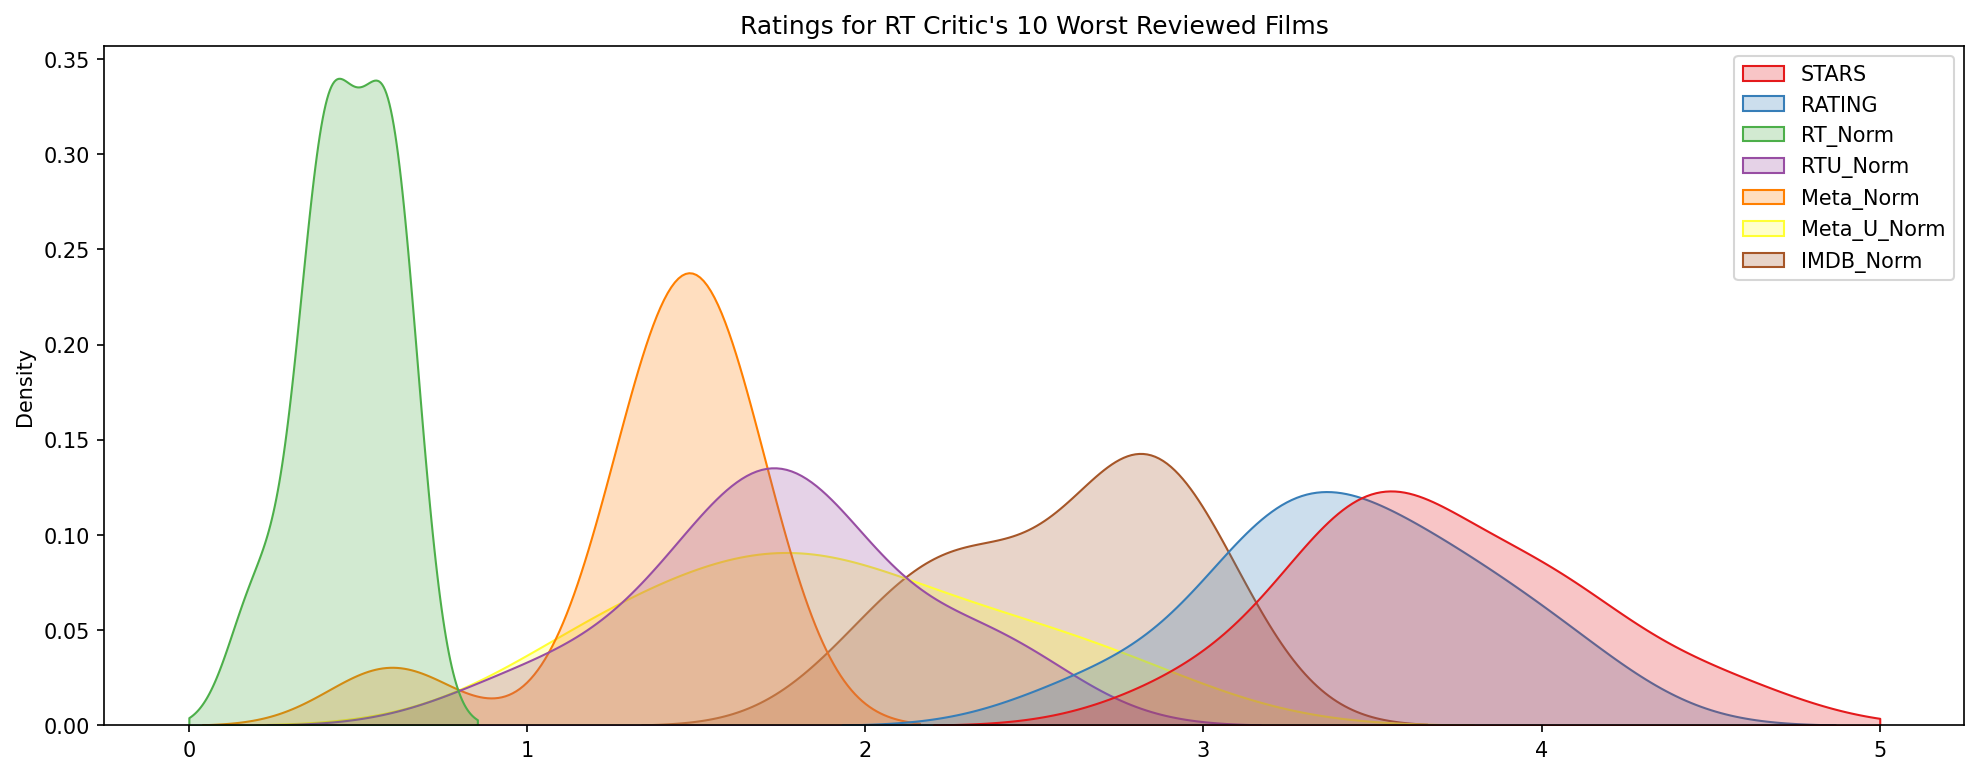

In [48]:
#Top 10 Worst Movies
plt.figure(figsize=(16,6),dpi=150)
worst_movies = norm_films.nsmallest(10,'RT_Norm').drop('FILM',axis=1)
sns.kdeplot(data=worst_movies,clip=[0,5],shade=True,palette='Set1')
plt.title('Ratings for RT Critic's 10 Worst Reviewed Films');

In [49]:
#Fandango is showing around 3-4 star ratings for films that are clearly not good.